<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">Hawkes process simulation</h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


We consider a Hawkes process $N$ with intensity
$$
\lambda_t = g_0(t) + \int_0^t K(t-s) dN_s.
$$
Its integrated intensity $U_t := \int_0^t \lambda_s ds$ can be written as
$$
U_t = \int_0^t g_0(s) ds + \int_0^t K(t-s) (U_sds + Z_s ds),
$$
where $Z := N - U$ is a martingale with $\langle Z \rangle = U$ and $K$ is a locally integrable kernel ($L^1([0,T])$, not necessarily $L^2$). We will take:
$$ g_0(t) \equiv \mu, $$
with $\mu \geq 0$.

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>

<a id="BS"></a><h1 style="text-align:center;">The scheme </h1>

<div style="background-color: rgb(0, 62, 92); height:10px; margin-top:25px; margin-bottom:25px;"></div>


Define
$$ U_{t,s} := U_s - U_t, \quad Z_{t,s}  = Z_s - Z_t, \quad t\leq s, $$
and
$$ g_t(s) := g_0(s) + \int_0^t K(s-u) (dU_{0,u} + dZ_{0,u}), \quad t < s .$$
When we write $dZ_{t,u}$ we mean differential in the second variable $u$.  (In case of square integrable kernel, $g_t(s) = \mathbb E[ \lambda_s | \mathcal F_t]$.)

The dynamics of $U$ can be written in the form
$$ U_{t,s} = \int_t^s g_t(u) du +  \int_t^s K(s-u) (U_{t,u}du + Z_{t,u} du)  $$

We are simply going to discretize the second integral appearing  using a right-point  approximation
$$
\int_t^s K(s-u) (b U_{t,u} + c Z_{t,u} du) \approx \int_t^s K(s-u) du (U_{t,s} + Z_{t,s}) = \int_0^{t-s} K(u) du  (U_{t,s} + Z_{t,s})
$$


This leads to the scheme
$$
U_{i,i+1}  = \alpha_i + \bar K_{\Delta t}  U_{i,i+1} + \bar K_{\Delta t} Z_{i,i+1}
$$
with
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(u) du, \quad   \bar K_{\Delta t} = \int_0^{\Delta t} K(u) du  $$

This means that, at time $t$ since we have access to $\alpha_i$, all we need to know to obtain $U_{i,i+1}$ is to simulate a random variable $U$ following the **Inverse Gaussian** distribution
$$ U \sim IG ( \alpha, (\alpha/\sigma)^2 )  $$
See https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

__TODO__: add motivation via the CF

The link $Z_{i, i+1} = \tilde W_{U_{i, i+1}}$ is absent for discontinuous processes, however, one can use the fact that $U_{i, i+1}$ is the integrated intensity of the process $N$ over $[t_i, t_{i+1}]$, so that the conditional law
$$
\mathcal{L}(N_{i, i+1} | U_{i, i+1}) \sim \mathcal{P}(U_{i, i+1}),
$$
and $N_{i, i+1}$ can be simulated _exactly_ once $U_{i, i+1}$ is known.

# Developping expression of $\alpha_i$
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \int_{t_i}^{t_{i+1}} g_{0}(s) ds  + \int_{t_i}^{t_{i+1}} \int_0^{t_{i}} K(s-u) (dU_{0,u} + dZ_{0,u})  du ds $$
Now we observe that $d{Z_{0,u}} = dZ_{t_j,u}$ whenever, $t_j\leq u$ (similar for $U$) so that we can write:
$$   \int_0^{t_{i}} K(s-u) (dU_{0,u} + dZ_{0,u}) = \sum_{j=0}^{i-1} \int_{t_{j}}^{t_{j+1}} K(s-u)  (dU_{{t_j},u} + dZ_{{t_j},u}),   $$
so that an application of Fubini yields
$$ \alpha_i =  \int_{t_i}^{t_{i+1}} g_{t_i}(s) ds = \sum_{j=0}^{i-1}  \int_{t_{j}}^{t_{j+1}}  \left(  \int_{t_i}^{t_{i+1}}  K(s-u)ds \right) (dU_{t_{j},u} +  dZ_{t_j,u})  du \approx \sum_{j=0}^{i-1} \bar K_{ij}  \int_{t_{j}}^{t_{j+1}}  (dU_{t_{j},u} + dZ_{t_j,u})  du = \sum_{j=0}^{i-1}  \bar K_{ij} (U_{t_{j},t_{j+1}} + Z_{t_{j},t_{j+1}})   ,  $$
with

$$ \bar K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

# Scheme



Fix $t_0 = 0 < t_1 < \ldots < t_n = T$ a partition and  construct $(Z_{j,j+1})_{i=0,\ldots, n}$ and $(U_{i,i+1})_{i=0,\ldots, n-1}$  recursively. For each $i=0,\ldots, N-1$
First we compute $\alpha_i$
$$ \alpha_{i}  = \int_{t_i}^{t_{i+1}} g_0(s) ds + \sum_{j=0}^{i-1}   \bar K_{ij} (U_{j,j+1}  +  Z_{j,j+1})  $$
with an initialization (for $i=0$) to $\alpha_0=\int_0^{t_1} g_0(s) ds$ and
$$ \bar K_{ij}:= \int_{t_i}^{t_{i+1}} K(s-t_j) ds, \quad j = 0,1, \ldots, i-1. $$

we  first simulate  (here we need $1- \bar K_{\Delta t}\geq 0$)
$$ U_{i,i+1} \sim IG \left(\frac{\alpha_i}{ 1 - \bar K_{\Delta t}}, \left(\frac{\alpha_i}{\bar K_{\Delta t}}\right)^2 \right) $$
and then, we simulate 
$$
N_{i, i+1} \sim \mathcal{P}(U_{i,i+1}),
$$ 
and set $Z_{i, i+1} = N_{i, i+1} - U_{i,i+1}$.

# Fractional kernel
$$K(t)=\frac{t^{H-1/2}}{\Gamma(H+0.5)} , \quad H \in (-1/2, 1/2], \quad g_0(t) = \mu.$$

We denote 

$$
\bar K(t) := \int_0^t K(s) ds = \dfrac{t^{H + 0.5}}{\Gamma(H+1.5)}, \quad \bar g_0(t) := \int_0^t g_0(s) ds = \mu t.
$$

The following quantities need to be computed with:

$$ \int_{t_i}^{t_{i+1}} g_0(s) ds = \bar g_0(t_{i+1}) - \bar g_0(t_{i})$$
$$  \bar K_{\Delta t} = \bar K(\Delta t), \quad i =0, \ldots, n.$$
$$ \bar K_{ij} = \int_{t_i - t_j}^{t_{i+1} - t_j} K(u) du  = \bar K(t_{i+1} - t_j) - \bar K(t_i - t_j), \quad j = 0, \ldots i-1, \quad  i =1, \ldots, n.$$

In [1]:
%load_ext autoreload
%autoreload 2
import sys
if "../" not in sys.path:
    sys.path.append("../")

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from scipy.special import gamma
from scipy.stats import ks_2samp, kstest

from volterra_hawkes.iVi.iVi_hawkes import IVIHawkesProcess
from volterra_hawkes.kernel.exponential_kernel import ExponentialKernel
from volterra_hawkes.kernel.constant_kernel import ConstantKernel
from volterra_hawkes.kernel.fractional_kernel import FractionalKernel
from volterra_hawkes.kernel.gamma_kernel import GammaKernel
from volterra_hawkes.point_processes.hawkes import simulate_hawkes, simulate_hawkes_ogata

color_cycle = ["#B56246", "#579F40", "#9A46B5", "#4699B5", "#B54662", "#D4A017", "#5b6c64", "#71074E", "#0033A0"]
plt.rcParams["figure.figsize"]        = ((1 + np.sqrt(5)) / 2 * 5, 5)
plt.rcParams["figure.autolayout"]     = True
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams["axes.grid"]             = True
plt.rcParams['axes.prop_cycle']       = matplotlib.cycler(color=color_cycle)

### Hawkes process simulation

In [2]:
mu = 3

def g0_const(t, mu=mu):
    return mu * np.ones_like(t)

def g0_bar_const(t, mu=mu):
    return mu * t

2.147342548061669 1.1929680822564828


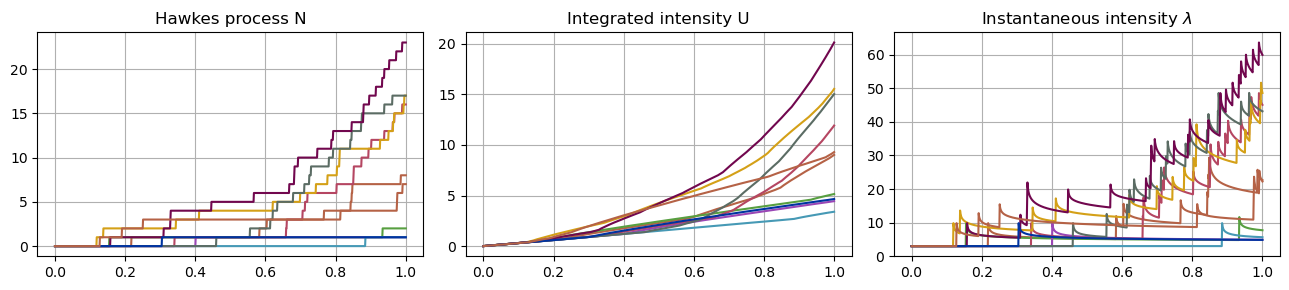

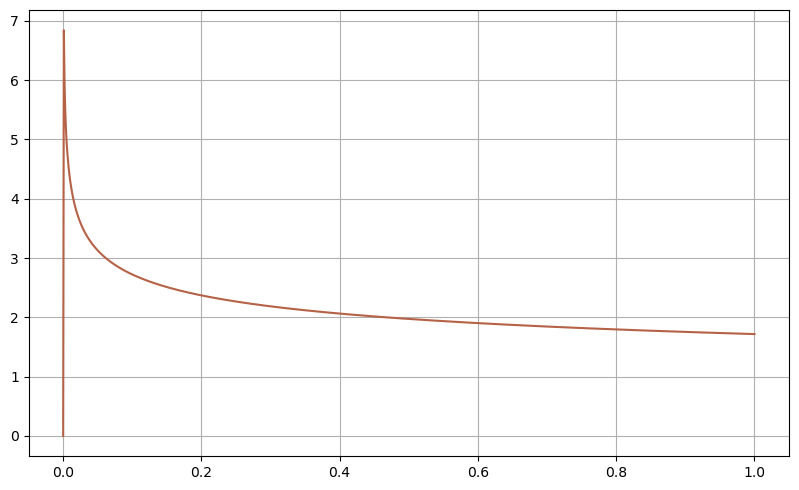

In [3]:
H = 0.3
lam = 1
c = 2
alpha = 2

T = 1
n_steps = 1000
n_paths = 10

t_grid = np.linspace(0, T, n_steps + 1)

rng = np.random.default_rng(seed=42)

#K = ConstantKernel(c=3)
K = FractionalKernel(H=H, c=c)
#K = ExponentialKernel(c=c, lam=lam)
#K = GammaKernel(lam=lam, alpha=alpha, c=lam**alpha)
ivi_hawkes = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const)
N, U, lam = ivi_hawkes.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)

print(K.integrated_kernel(T), K.double_integrated_kernel(T) / T)

fig, ax = plt.subplots(1, 3, figsize=(13, 3))
n_show = n_paths

ax[0].plot(t_grid, N[:, 0:n_show])
ax[0].set_title('Hawkes process N')
ax[0].grid("on")

#ax[1].plot(t_grid, U[:,0:n_show])
ax[1].plot(t_grid, U[:,0:n_show])
ax[1].set_title('Integrated intensity U')
ax[1].grid("on")

#ax[2].plot(t_grid[1:], dU[:, 0:n_show] / np.diff(t_grid).reshape((-1, 1)))
ax[2].plot(t_grid, lam[:,0:n_show])
ax[2].set_title('Instantaneous intensity $\lambda$')
ax[2].grid("on")

plt.show()

plt.plot(t_grid, K(t_grid))

# Sanity check

To check the proposed simulation algorighm, we compute the empirical means over the simulated trajectories of $N$ and $U$.

Note that
$$
\mathbb{E}[N_t] = \mathbb{E}[U_t] =: m_t,  
$$
where $m$ satisfies the Fredholm's equation
$$
m_t = \bar g_0(t) + \int_0^tK(t - s)m_sds,
$$
and hence,
$$
m_t = \bar g_0(t) + \int_0^tR(t - s) g_0(s)ds,
$$
where $R$ is the resolvent of $K$ satisfying
$$
R * K = K * R = R - K.
$$

For instance, the resolvent corresponding to the fractional kernel is given by
$$
R(t) = t^{\alpha - 1} E_{\alpha, \alpha}(t^\alpha), \quad \alpha = H + 0.5,
$$
where $E_{\alpha, \beta}$ denotes the Mittag–Leffler function
$$
E_{\alpha, \beta}(z) = \sum_{n \geq 0}\dfrac{z^n}{\Gamma(\alpha n + \beta)}.
$$

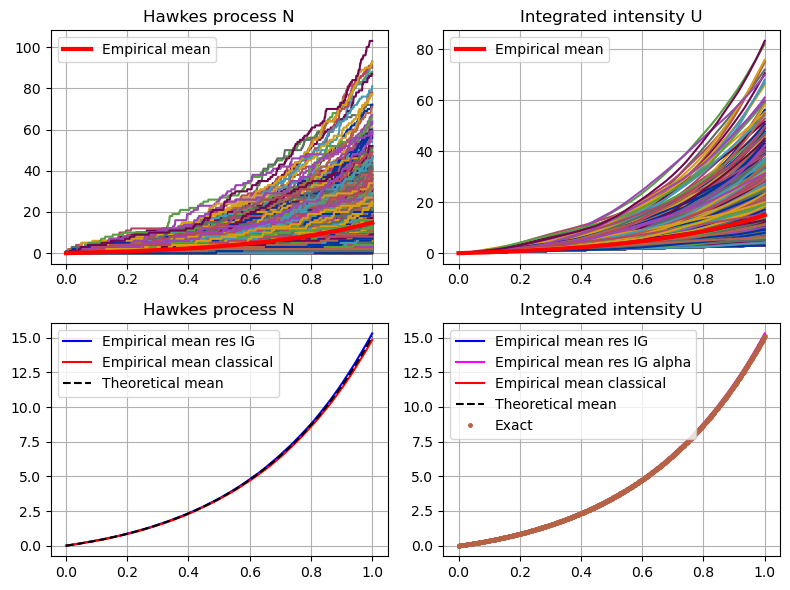

In [4]:
rng = np.random.default_rng(seed=42)

g0_bar_res = lambda t : mu * t + mu * K.resolvent_as_kernel().double_integrated_kernel(t)

res_IG = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const, trapeze=False, resolvent_IG=True, resolvent_alpha=False)
#res_IG_trapeze = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_res, rng=rng, g0=g0_const, trapeze=True, resolvent_IG=True, resolvent_alpha=False)
res_IG_alpha = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_res, rng=rng, g0=g0_const, trapeze=False, resolvent_IG=True, resolvent_alpha=True)
#ivi_hawkes_trapeze = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const, trapeze=True, resolvent = False)
ivi_hawkes = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const)


n_show = 1000
n_paths = 10000

N_res_IG, U_res_IG, lam = res_IG.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)
#N_res_IG_trapeze, U_res_IG_trapeze, lam = res_IG_trapeze.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)
N_res_IG_alpha, U_res_IG_alpha, lam = res_IG_alpha.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)
#N_res, U_res, lam = ivi_hawkes_res.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)
N, U, lam = ivi_hawkes.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)

ivi_hawkes_exact = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const, trapeze=False, resolvent_IG = False, resolvent_alpha=False)
expected_U = ivi_hawkes_exact.U_mean(t_grid=t_grid)

hawkes_arrivals_sample = [simulate_hawkes(T=T, g0=lambda t : g0_const(t, mu=mu), g0_upper_bound=mu, kernel=K, rng=rng)
                          for _ in range(n_paths)]
N_T_sample = np.array([len(hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample])
U_sample = np.array([ivi_hawkes_exact.U_from_jumps(np.array(t_grid), hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample])

fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0, 0].plot(t_grid, N[:, 0:n_show])
ax[0, 0].plot(t_grid, N.mean(axis=1), "r", lw=3, label="Empirical mean")
ax[0, 0].set_title('Hawkes process N')
ax[0, 0].legend()
ax[0, 0].grid("on")

ax[0, 1].plot(t_grid, U[:,0:n_show])
ax[0, 1].plot(t_grid, U.mean(axis=1), "r", lw=3, label="Empirical mean")
ax[0, 1].set_title('Integrated intensity U')
ax[0, 1].legend()
ax[0, 1].grid("on")

ax[1, 0].plot(t_grid, N_res_IG.mean(axis=1), "b", label="Empirical mean res IG")
ax[1, 0].plot(t_grid, N.mean(axis=1), "r", label="Empirical mean classical")
ax[1, 0].plot(t_grid, expected_U, "k--", label="Theoretical mean")
ax[1, 0].set_title('Hawkes process N')
ax[1, 0].legend()
ax[1, 0].grid("on")

ax[1, 1].plot(t_grid, U_res_IG.mean(axis=1), "b", label="Empirical mean res IG")
#ax[1, 1].plot(t_grid, U_res_IG_trapeze.mean(axis=1), "g", label="Empirical mean res IG trapeze")
ax[1, 1].plot(t_grid, U_res_IG_alpha.mean(axis=1), "magenta", label="Empirical mean res IG alpha")
ax[1, 1].plot(t_grid, U.mean(axis=1), "r", label="Empirical mean classical")
ax[1, 1].plot(t_grid, expected_U, "k--", label="Theoretical mean")
ax[1, 1].plot(t_grid, np.mean(U_sample, axis = 0), label = "Exact", linestyle = ' ', marker = '.', ms = 5)
ax[1, 1].set_title('Integrated intensity U')
ax[1, 1].legend()
ax[1, 1].grid("on")

plt.show()

/var/folders/n8/x19ps_h16ng3xc6b7rszr8bw0000gn/T/ipykernel_75178/2787697501.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(t_grid, np.abs(U_res_IG.mean(axis = 1) - U_sample.mean(axis = 0)) / U_sample.mean(axis = 0), label = "res IG")
/var/folders/n8/x19ps_h16ng3xc6b7rszr8bw0000gn/T/ipykernel_75178/2787697501.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(t_grid, np.abs(U.mean(axis = 1) - U_sample.mean(axis = 0)) / U_sample.mean(axis = 0), label = "classical")
/var/folders/n8/x19ps_h16ng3xc6b7rszr8bw0000gn/T/ipykernel_75178/2787697501.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(t_grid, np.abs(U_res_IG_alpha.mean(axis = 1) - U_sample.mean(axis = 0)) / U_sample.mean(axis = 0), label = "res IG alpha")


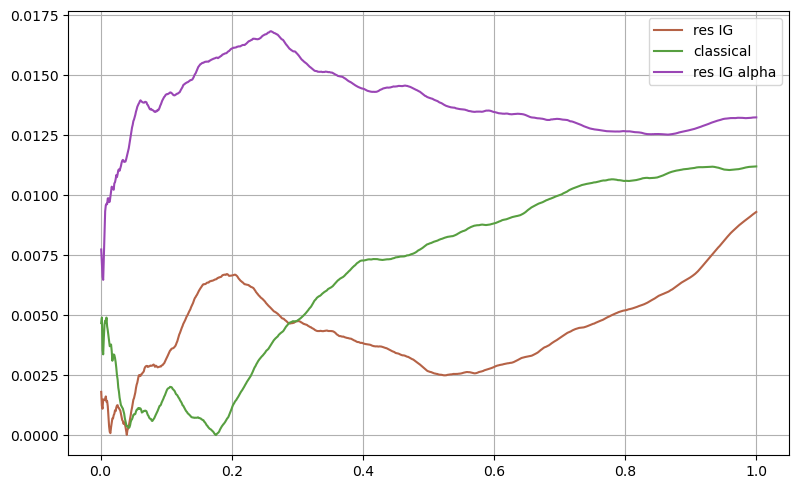

In [5]:
plt.plot(t_grid, np.abs(U_res_IG.mean(axis = 1) - U_sample.mean(axis = 0)) / U_sample.mean(axis = 0), label = "res IG")
plt.plot(t_grid, np.abs(U.mean(axis = 1) - U_sample.mean(axis = 0)) / U_sample.mean(axis = 0), label = "classical")
#plt.plot(t_grid, np.abs(U_res_IG_trapeze.mean(axis = 1) - U_sample.mean(axis = 0)) / U_sample.mean(axis = 0), label = 'res IG trapeze')
plt.plot(t_grid, np.abs(U_res_IG_alpha.mean(axis = 1) - U_sample.mean(axis = 0)) / U_sample.mean(axis = 0), label = "res IG alpha")
plt.legend()
plt.show()

## Simulation of the jump moments

In [255]:
H = 0.3
lam = 1.1
c = 1
alpha = 2.5

T = 5
n_steps = 100
n_paths = 1

t_grid = np.linspace(0, T, n_steps + 1)

rng = np.random.default_rng(seed = 42)


# K = FractionalKernel(H=H, c=c)
K = ExponentialKernel(lam=lam, c=c)
# K = GammaKernel(lam=lam, alpha=alpha, c=lam**alpha * 0.95)

ivi_hawkes_trapeze_res = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_res, rng=rng, g0=g0_const, trapeze=True, resolvent=True)
ivi_hawkes = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const, trapeze=False, resolvent=False)

In [256]:
%%time
t_grid = np.linspace(0, T, n_steps + 1)
N_jumps = ivi_hawkes.simulate_arrivals(t_grid=t_grid, n_paths=n_paths)
N_jumps_trapeze_res = ivi_hawkes_trapeze_res.simulate_arrivals(t_grid=t_grid, n_paths=n_paths)
N_jumps[0].shape

0.5
0.5
0.5000000000000002
0.4999999999999998
0.5
0.5000000000000004
0.5
0.49999999999999956
0.5
0.5
0.5
0.5000000000000009
0.4999999999999991
0.5000000000000009
0.4999999999999991
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5000000000000018
0.5
0.4999999999999982
0.5
0.5
0.5000000000000018
0.5
0.4999999999999982
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5000000000000036
0.49999999999999645
0.5
0.5
0.5
0.5000000000000036
0.49999999999999645
0.5000000000000036
0.49999999999999645
0.5
0.5000000000000036
0.49999999999999645
0.5000000000000036
0.49999999999999645
0.5
0.5000000000000036
0.49999999999999645
0.5000000000000036
0.49999999999999645
0.5
0.5000000000000036
0.49999999999999645
0.5000000000000036
0.49999999999999645
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5000000000000071
0.4999999999999929
0.5
0.5
0.5
0.5000000000000071
0.4999999999999929
0.5
0.5
0.5
0.5000000000000071
0.4999999999999929
0.5
0.5
0.5000000000000071
0.5
0.4999999999999929
0.5
0.5
0.5321509408483724
m

(180,)

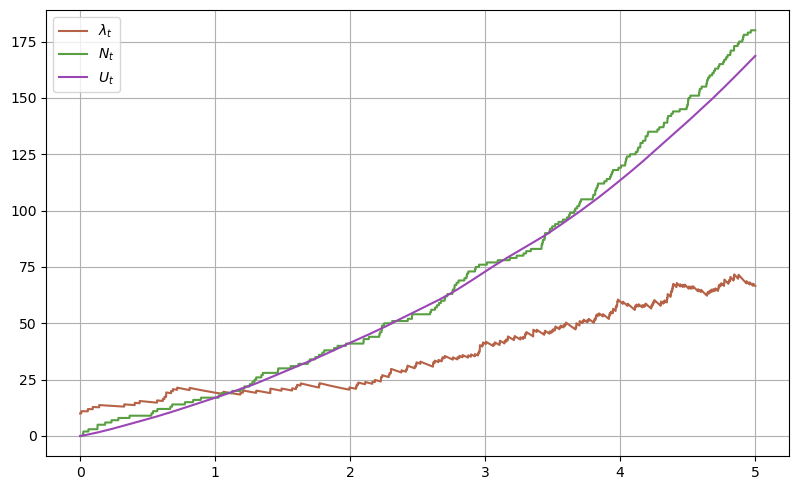

In [257]:
idx = 0

t_grid_fine = np.linspace(0, T, 10**4)
plt.plot(t_grid_fine, ivi_hawkes_trapeze_res.lam_from_jumps(t_grid_fine, N_jumps_trapeze_res[idx]), label="$\lambda_t$")
plt.plot(t_grid_fine, ivi_hawkes.N_from_jumps(t_grid_fine, N_jumps[idx]), label="$N_t$")
plt.plot(t_grid_fine, ivi_hawkes.U_from_jumps(t_grid_fine, N_jumps[idx]), label="$U_t$")
# plt.plot(t_grid_fine, ivi_hawkes.lam_from_jumps(t_grid_fine, N_jumps[idx]), label="$\lambda_t$")
plt.legend()

In [258]:
from scipy.stats import expon
import statsmodels.api as sm

def poisson_jumps_test(jumps):
    data = np.diff(jumps, prepend=0)
    data_unif = 1 - np.exp(-data)

    # Compute theoretical quantiles (from an Exponential(1) distribution)
    n = len(data)
    empirical_quantiles = np.sort(data)
    theoretical_quantiles = expon.ppf((np.arange(1, n+1) - 0.5) / n, scale=1.0)  # Inverse CDF (percent-point function)

    # Q-Q plot
    fig, ax =  plt.subplots(2, 2, figsize=(9, 8))
    ax[0, 0].scatter(theoretical_quantiles, empirical_quantiles, label="Observed vs. Exponential", s=10)
    ax[0, 0].plot(theoretical_quantiles, theoretical_quantiles, c=color_cycle[1], linestyle="dashed", label="y = x")

    ax[0, 0].set_xlabel("Theoretical Quantiles (Exponential)")
    ax[0, 0].set_ylabel("Empirical Quantiles (Data)")
    ax[0, 0].set_title("Q-Q Plot Against Exponential Distribution")
    ax[0, 0].legend()

    ax[0, 1].scatter(data_unif[:-1], data_unif[1:], s=10)
    ax[0, 1].set_title(r"$(e^{-\tau_i}, e^{-\tau_{i+1}})$")
        
    x_grid = np.linspace(data.min(), data.max(), num=1000)
    ecdf = sm.distributions.ECDF(data)
    ax[1, 0].plot(x_grid, ecdf(x_grid), label="ECDF")
    ax[1, 0].plot(x_grid, 1 - np.exp(-x_grid), "--", label="Exact CDF")
    ax[1, 0].set_title("Empirical CDF")
    ax[1, 0].legend()

    x_grid = np.linspace(0, np.max(data), 1000)
    ax[1, 1].hist(data, bins=20, density=True, alpha=0.4)
    ax[1, 1].plot(x_grid, np.exp(-x_grid), label="PDF")
    ax[1, 1].set_title("Histogram")
    ax[1, 1].legend()

    print("Kolmogorov-Smirnov test p-value: ", kstest(rvs=data, cdf=lambda x: 1 - np.exp(-x)).pvalue)
    
    plt.show()

Kolmogorov-Smirnov test p-value:  0.8947683955207079


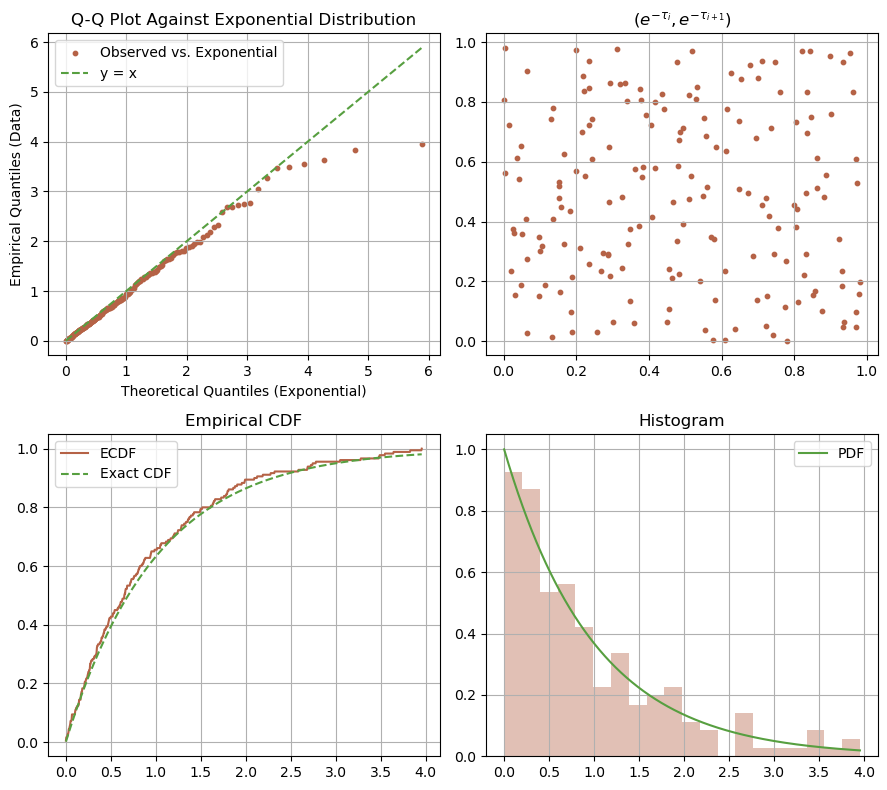

Kolmogorov-Smirnov test p-value:  0.133219905763292


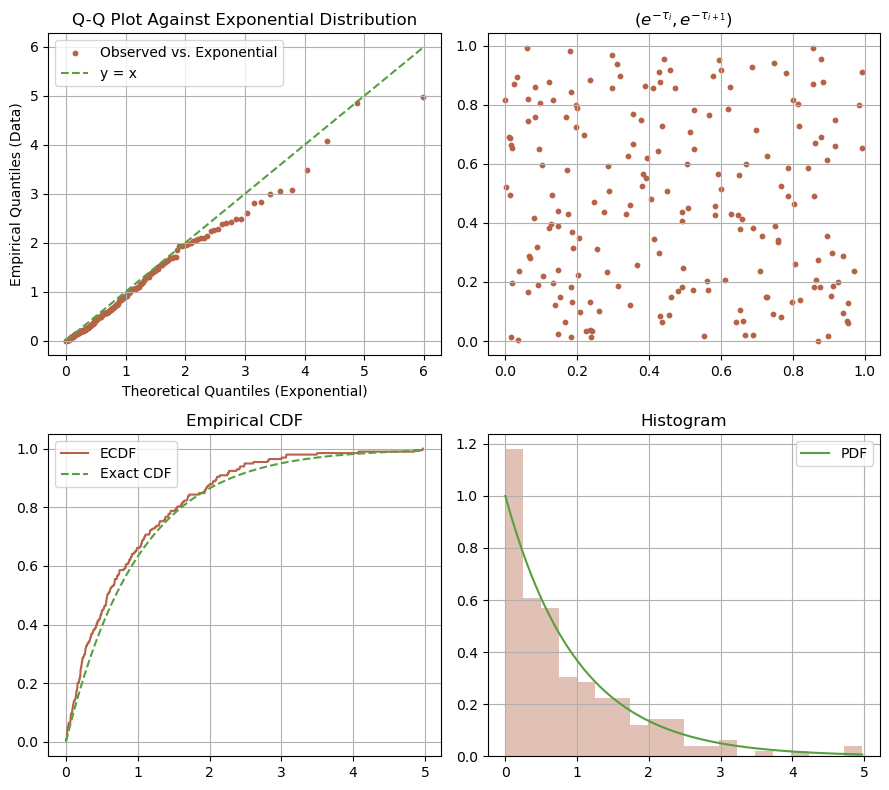

In [259]:
poisson_jumps_test(ivi_hawkes.U_from_jumps(N_jumps[idx], N_jumps[idx]))
poisson_jumps_test(ivi_hawkes.U_from_jumps(N_jumps_trapeze_res[idx], N_jumps_trapeze_res[idx]))

## Benchmarking to the exact methods

#### Population approach
__Goal__: simulate exactly the jump times of the Hawkes process on $[0, T]$.

1. Simulate an inhomogeneous Poisson process with intensity $g_0(t)$ via thinning, denote each jump times by $t_1^0, \ldots, t_N^0$.
2. For each $t_i^0$, simulate the descendants on $[t_i^0, T]$ as the arrivals of inhomogeneous Poisson process with intensity $\bar K(t - t_i^0)$. It can be done exactly if $\bar K$ is inversible: simulate a Poisson field on $[0, \bar K(T - t_i^0)]$, apply $\bar K^{-1}$ and shift by $t_i^0$. This gives the first generation of descendants of $t_i^0$.
3. Repeat the previous step for all newly simulated points until no descendents are generated.

- Compare marginal laws of $N_T$ and $U_T$
- Compare the characteristic funcitons

In [10]:
from volterra_hawkes.point_processes.hawkes import simulate_hawkes, simulate_hawkes_ogata

In [11]:
kernel = ivi_hawkes.kernel
rng = np.random.default_rng(seed=42)
g0_upper_bound = mu

In [12]:
%%time
rng = np.random.default_rng(seed=42)
hawkes_arrivals = simulate_hawkes(T=T, g0=g0_const, g0_upper_bound=mu, kernel=kernel, rng=rng)
print("N_T =", len(hawkes_arrivals))

N_T = 40
CPU times: user 731 µs, sys: 253 µs, total: 984 µs
Wall time: 798 µs


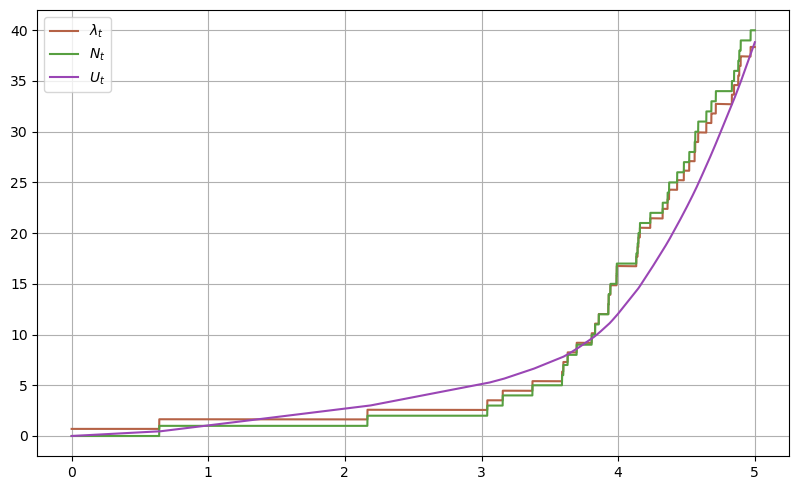

In [13]:
plt.plot(t_grid_fine, ivi_hawkes.lam_from_jumps(t_grid_fine, hawkes_arrivals), label="$\lambda_t$")
plt.plot(t_grid_fine, ivi_hawkes.N_from_jumps(t_grid_fine, hawkes_arrivals), label="$N_t$")
plt.plot(t_grid_fine, ivi_hawkes.U_from_jumps(t_grid_fine, hawkes_arrivals), label="$U_t$")
plt.legend()

Kolmogorov-Smirnov test p-value:  0.9794730658206828


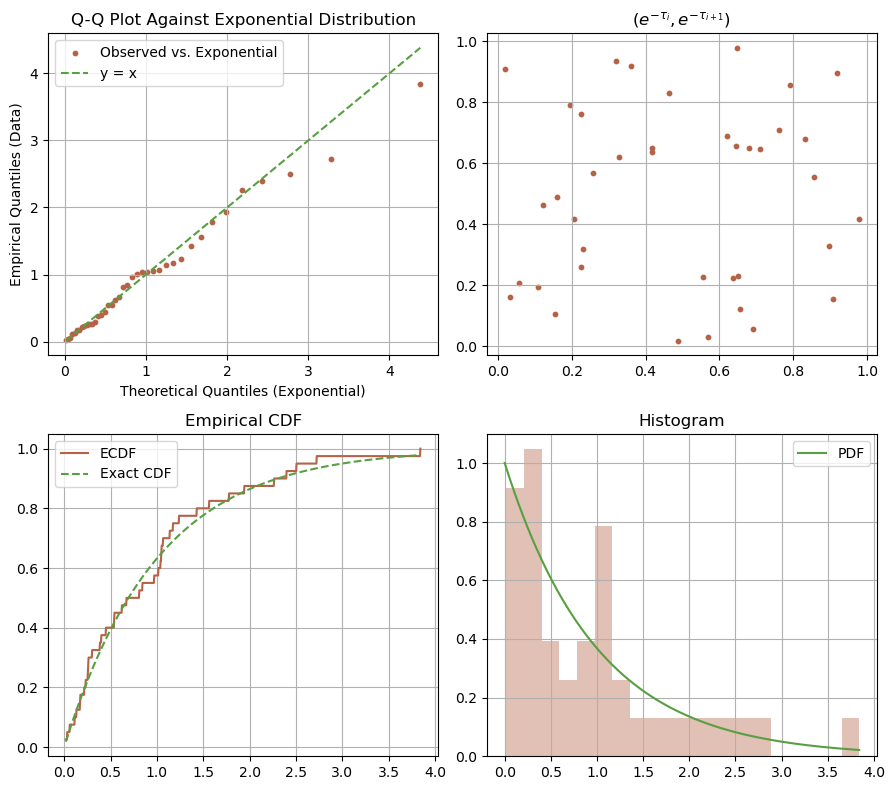

In [14]:
poisson_jumps_test(ivi_hawkes.U_from_jumps(hawkes_arrivals, hawkes_arrivals))

#### Ogata's algorithm

Assumptions:
- $g_0 \equiv \mu$
- $K$ is non-increasµing

In [15]:
kernel = ivi_hawkes.kernel
rng = np.random.default_rng(seed=42)

In [16]:
%%time
rng = np.random.default_rng(seed=42)
hawkes_arrivals = simulate_hawkes_ogata(T=T, mu=mu, kernel=kernel, rng=rng)
print("N_T =", len(hawkes_arrivals))

N_T = 129
CPU times: user 1.35 ms, sys: 110 µs, total: 1.46 ms
Wall time: 1.41 ms


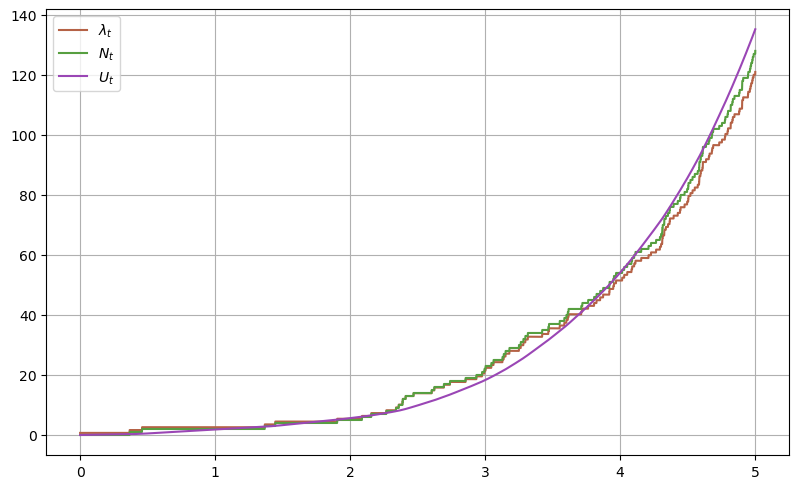

In [17]:
plt.plot(t_grid_fine, ivi_hawkes.lam_from_jumps(t_grid_fine, hawkes_arrivals), label="$\lambda_t$")
plt.plot(t_grid_fine, ivi_hawkes.N_from_jumps(t_grid_fine, hawkes_arrivals), label="$N_t$")
plt.plot(t_grid_fine, ivi_hawkes.U_from_jumps(t_grid_fine, hawkes_arrivals), label="$U_t$")
plt.legend()

Kolmogorov-Smirnov test p-value:  0.4460211808731923


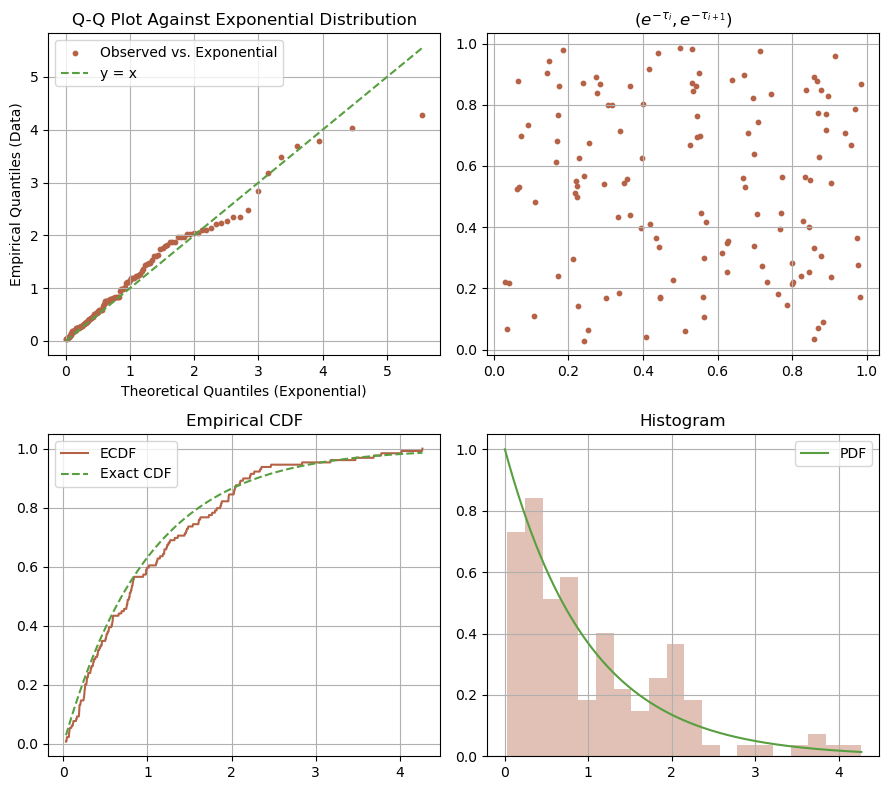

In [18]:
poisson_jumps_test(ivi_hawkes.U_from_jumps(hawkes_arrivals, hawkes_arrivals))

### Comparing marginal laws of $N_T$

In [1049]:
H = 0.3
c = 3
lam = 2
alpha = 2
mu = 10
T = 10
kernel = FractionalKernel(c=c, H=H)
#kernel = ExponentialKernel(c=c, lam=lam)
#kernel = GammaKernel(lam=lam, alpha=alpha, c=lam**alpha * 0.95)
#kernel = ConstantKernel(c = 0.1)
rng = np.random.default_rng(seed=42)
n_steps = 20
t_grid = np.linspace(0, T, n_steps + 1)

print(kernel.integrated_kernel(T), kernel.double_integrated_kernel(T) / T)

20.323223277214836 11.290679598452682


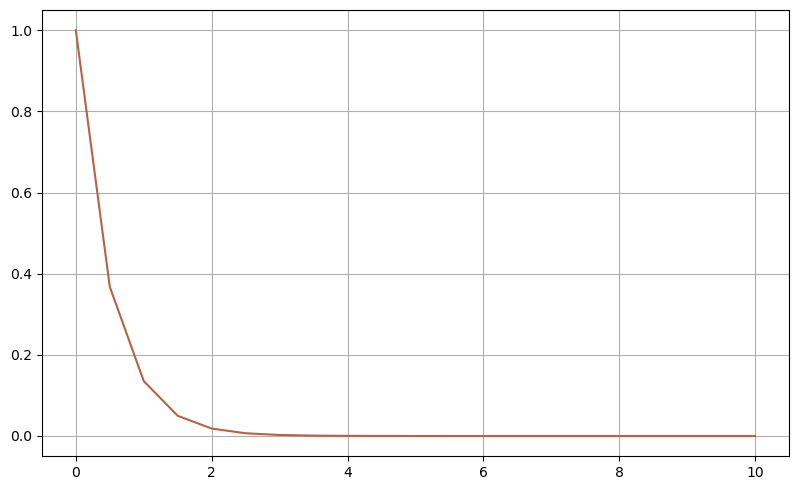

In [1018]:
plt.plot(t_grid, kernel(t_grid))

#### Population approach

In [1019]:
%%time
n_paths = 5000
rng = np.random.default_rng(seed=42)

def g0_const(t):
    return mu * np.ones_like(t)

def g0_bar_const(t):
    return mu * t

ivi_hawkes_for_jumps= IVIHawkesProcess(kernel=kernel, g0_bar=g0_bar_const, rng=rng, g0=g0_const)

hawkes_arrivals_sample = [simulate_hawkes(T=T, g0=g0_const, g0_upper_bound=mu, kernel=kernel, rng=rng)
                          for _ in range(n_paths)]

print('.')

N_sample = np.array([ivi_hawkes_for_jumps.N_from_jumps(np.array(t_grid), hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample])
U_sample = np.array([ivi_hawkes_for_jumps.U_from_jumps(np.array(t_grid), hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample])

.
CPU times: user 7.16 s, sys: 52.5 ms, total: 7.21 s
Wall time: 7.22 s


In [1020]:
N_T_sample = N_sample[:,-1]
U_T_sample = U_sample[:,-1]

#### Ogata

In [1021]:
%%time
rng = np.random.default_rng(seed=42)

hawkes_arrivals_sample_ogata = [simulate_hawkes_ogata(T=T, mu=mu, kernel=kernel, rng=rng, batch_size=400)
                                for _ in range(n_paths)]

print('.')

N_sample_ogata = np.array([ivi_hawkes_for_jumps.N_from_jumps(np.array(t_grid), hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample_ogata])
U_sample_ogata = np.array([ivi_hawkes_for_jumps.U_from_jumps(np.array(t_grid), hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample_ogata])


.
CPU times: user 7.42 s, sys: 54.1 ms, total: 7.47 s
Wall time: 7.48 s


In [1022]:
N_T_sample_ogata = N_sample_ogata[:,-1]
U_T_sample_ogata = U_sample_ogata[:,-1]

#### iVi

In [1050]:
%%time

rng = np.random.default_rng(seed=42)

g0_bar_res = lambda t : mu * t + mu * kernel.resolvent_as_kernel().double_integrated_kernel(t)

res_IG = IVIHawkesProcess(kernel=kernel, g0_bar=g0_bar_const, rng=rng, g0=g0_const, trapeze=False, resolvent_IG=True, resolvent_alpha=False)
#res_IG_trapeze = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_res, rng=rng, g0=g0_const, trapeze=True, resolvent_IG=True, resolvent_alpha=False)
res_IG_alpha = IVIHawkesProcess(kernel=kernel, g0_bar=g0_bar_res, rng=rng, g0=g0_const, trapeze=False, resolvent_IG=True, resolvent_alpha=True)
#ivi_hawkes_trapeze = IVIHawkesProcess(kernel=K, g0_bar=g0_bar_const, rng=rng, g0=g0_const, trapeze=True, resolvent = False)
ivi_hawkes = IVIHawkesProcess(kernel=kernel, g0_bar=g0_bar_const, rng=rng, g0=g0_const, trapeze=False, resolvent_IG=False, resolvent_alpha=False)

N_res_IG, U_res_IG, lam = res_IG.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)

N_res_IG_alpha, U_res_IG_alpha, lam = res_IG_alpha.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)
N, U, lam = ivi_hawkes.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)
#N_trapeze, U_trapeze, lam = ivi_hawkes_trapeze.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)
#N_res, U_res, lam = ivi_hawkes_res.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)
#N, U, lam = ivi_hawkes.simulate_on_grid(t_grid=t_grid, n_paths=n_paths)

19.053309897860025
-2046.3595034383602


ValueError: mean <= 0

### Law of $N_T$

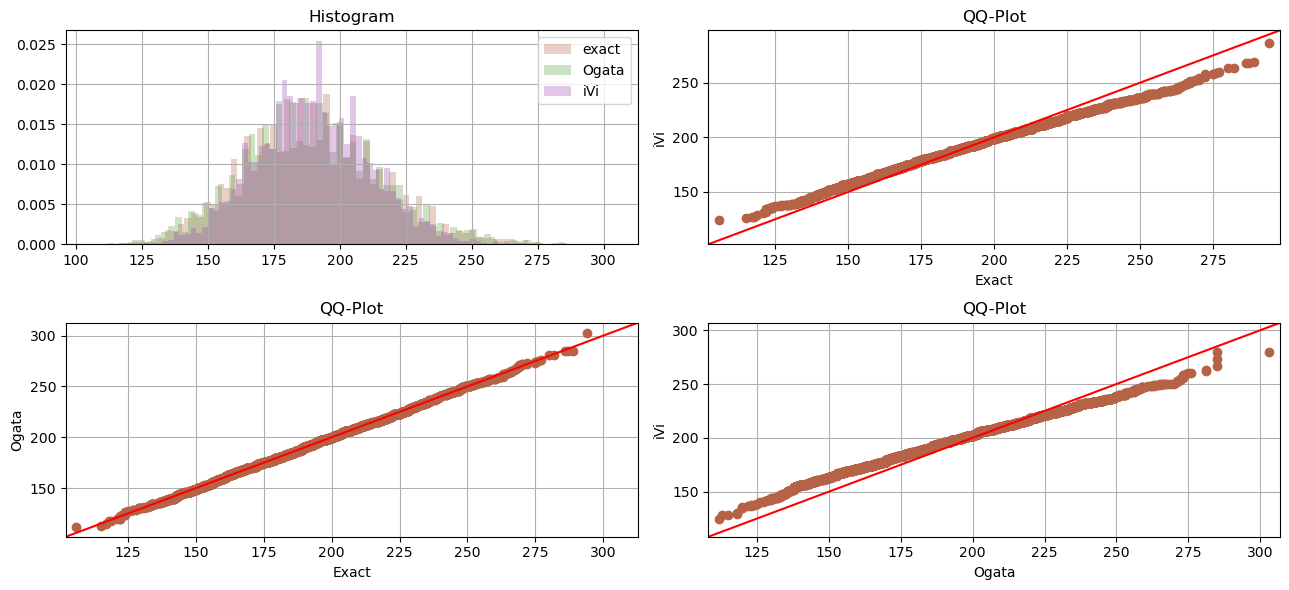

In [1033]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

fig, ax = plt.subplots(2, 2, figsize=(13, 6))

ax[0,0].hist(N_T_sample, density=True, bins=75, alpha=0.3, label="exact")
ax[0,0].hist(N_T_sample_ogata, density=True, bins=75, alpha=0.3, label="Ogata")
ax[0,0].hist(N_res_IG_alpha[-1], density=True, bins=75, alpha=0.3, label="iVi")
ax[0,0].set_title("Histogram")
ax[0,0].legend()

qqplot_2samples(sm.ProbPlot(N_T_sample), sm.ProbPlot(N_res_IG_alpha[-1]), ax=ax[0,1], xlabel="Exact", ylabel="iVi", line="45")
#ax[1].plot(np.linspace(0, max(np.max(N_T_sample), np.max(N[-1])), 100), np.linspace(0, max(np.max(N_T_sample), np.max(N[-1])), 100), "--")
ax[0,1].set_title("QQ-Plot")

qqplot_2samples(sm.ProbPlot(N_T_sample), sm.ProbPlot(N_T_sample_ogata), ax=ax[1,0], xlabel="Exact", ylabel="Ogata", line="45")
#ax[2].plot(np.linspace(0, max(np.max(N_T_sample), np.max(N_T_sample_ogata)), 100),
#           np.linspace(0, max(np.max(N_T_sample), np.max(N_T_sample_ogata)), 100), "--")
ax[1,0].set_title("QQ-Plot")

qqplot_2samples(sm.ProbPlot(N_T_sample_ogata), sm.ProbPlot(N[-1]), ax=ax[1,1], xlabel="Ogata", ylabel="iVi", line="45")
ax[1,1].set_title("QQ-Plot")

plt.show()

In [1034]:
print("p-value Exact-Ogata:", ks_2samp(N_T_sample, N_T_sample_ogata).pvalue)
print("p-value Exact-iVi:", ks_2samp(N_T_sample, N[-1]).pvalue)
print("p-value Ogata-iVi:", ks_2samp(N_T_sample_ogata, N_res_IG[-1]).pvalue)

p-value Exact-Ogata: 0.8643325152980597
p-value Exact-iVi: 1.0273602517478246e-38
p-value Ogata-iVi: 0.0


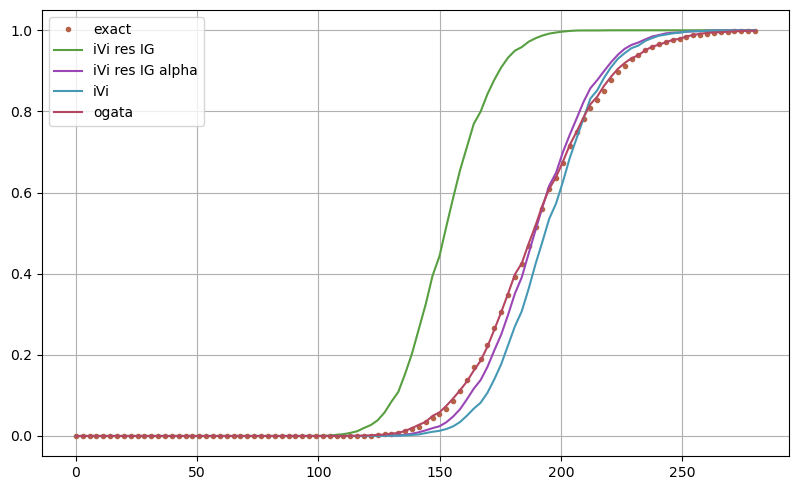

[]

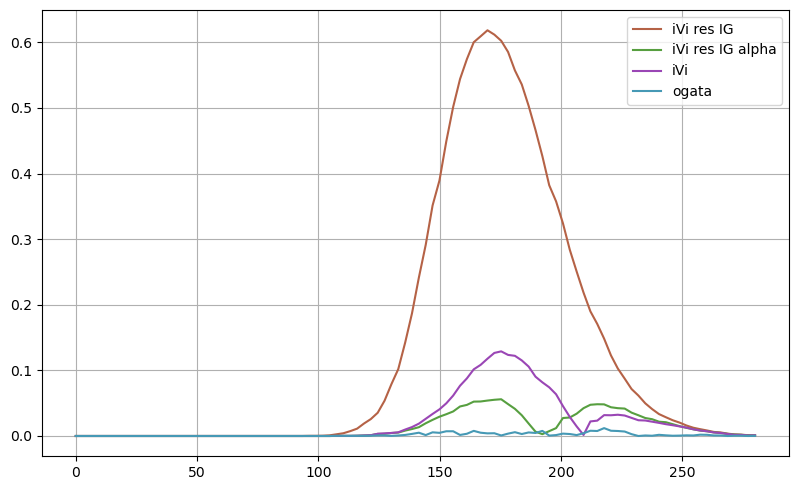

In [1035]:
CDF_exact = sm.distributions.ECDF(N_T_sample)
CDF_iVi_res_IG = sm.distributions.ECDF(N_res_IG[-1])
CDF_iVi_res_IG_alpha = sm.distributions.ECDF(N_res_IG_alpha[-1])
CDF_iVi = sm.distributions.ECDF(N[-1])
CDF_ogata = sm.distributions.ECDF(N_T_sample_ogata)

X = np.linspace(0,np.max(N[-1]), 100)
plt.plot(X, CDF_exact(X), label="exact", linestyle = ' ', marker = '.')
plt.plot(X, CDF_iVi_res_IG(X), label="iVi res IG")
plt.plot(X, CDF_iVi_res_IG_alpha(X), label="iVi res IG alpha")
plt.plot(X, CDF_iVi(X), label="iVi")
plt.plot(X, CDF_ogata(X), label="ogata")
plt.legend()
plt.plot()
plt.show()

X = np.linspace(0,np.max(N[-1]), 100)
plt.plot(X, np.abs(CDF_iVi_res_IG(X) - CDF_exact(X)), label="iVi res IG")
plt.plot(X, np.abs(CDF_iVi_res_IG_alpha(X) - CDF_exact(X)), label="iVi res IG alpha")
plt.plot(X, np.abs(CDF_iVi(X) - CDF_exact(X)), label="iVi")
plt.plot(X, np.abs(CDF_ogata(X) - CDF_exact(X)), label="ogata")
plt.legend()
plt.plot()

### Law of $U_T$

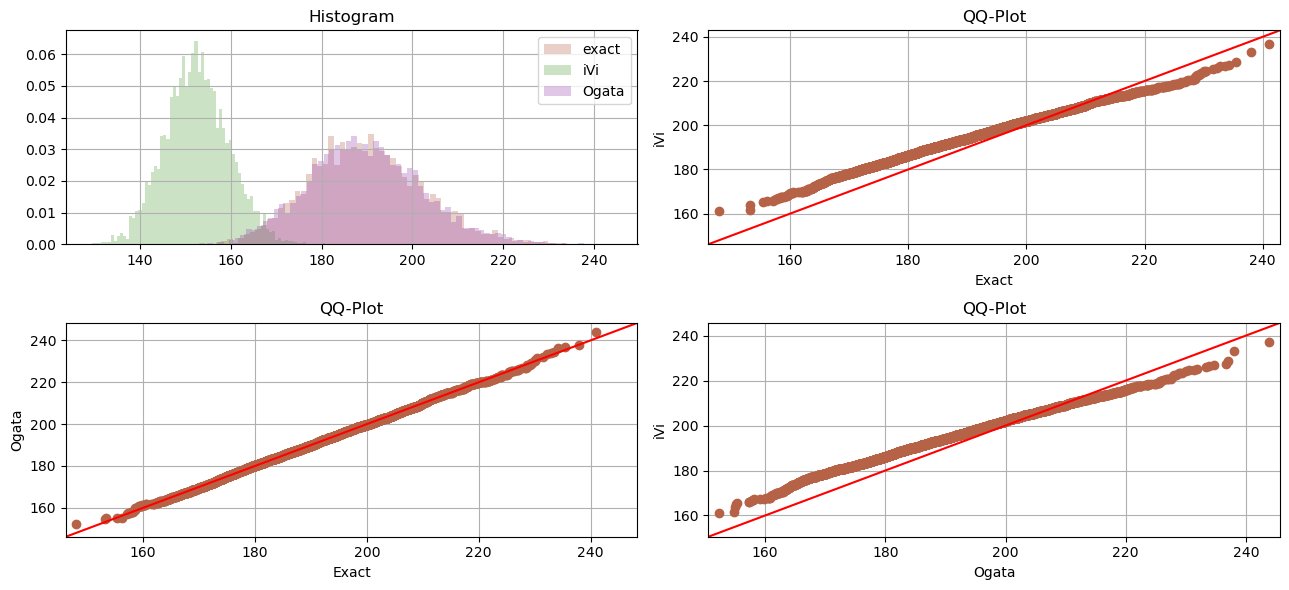

In [1036]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

fig, ax = plt.subplots(2, 2, figsize=(13, 6))

ax[0,0].hist(U_T_sample, density=True, bins=75, alpha=0.3, label="exact")
ax[0,0].hist(U_res_IG[-1], density=True, bins=75, alpha=0.3, label="iVi")
ax[0,0].hist(U_T_sample_ogata, density=True, bins=75, alpha=0.3, label="Ogata")
ax[0,0].set_title("Histogram")
ax[0,0].legend()

qqplot_2samples(sm.ProbPlot(U_T_sample), sm.ProbPlot(U[-1]), ax=ax[0,1], xlabel="Exact", ylabel="iVi", line="45")
#ax[1].plot(np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), "--")
ax[0,1].set_title("QQ-Plot")

qqplot_2samples(sm.ProbPlot(U_T_sample), sm.ProbPlot(U_T_sample_ogata), ax=ax[1,0], xlabel="Exact", ylabel="Ogata", line="45")
#ax[2].plot(np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), np.linspace(0, max(np.max(U_T_sample), np.max(U[-1])), 100), "--")
ax[1,0].set_title("QQ-Plot")

qqplot_2samples(sm.ProbPlot(U_T_sample_ogata), sm.ProbPlot(U[-1]), ax=ax[1,1], xlabel="Ogata", ylabel="iVi", line="45")
ax[1,1].set_title("QQ-Plot")

plt.show()

In [1037]:
print("p-value Exact-Ogata:", ks_2samp(U_T_sample, U_T_sample_ogata).pvalue)
print("p-value Exact-iVi:", ks_2samp(U_T_sample, U[-1]).pvalue)
print("p-value Ogata-iVi:", ks_2samp(U_T_sample_ogata, U_res_IG[-1]).pvalue)

p-value Exact-Ogata: 0.9415017074119454
p-value Exact-iVi: 1.794736610505424e-76
p-value Ogata-iVi: 0.0


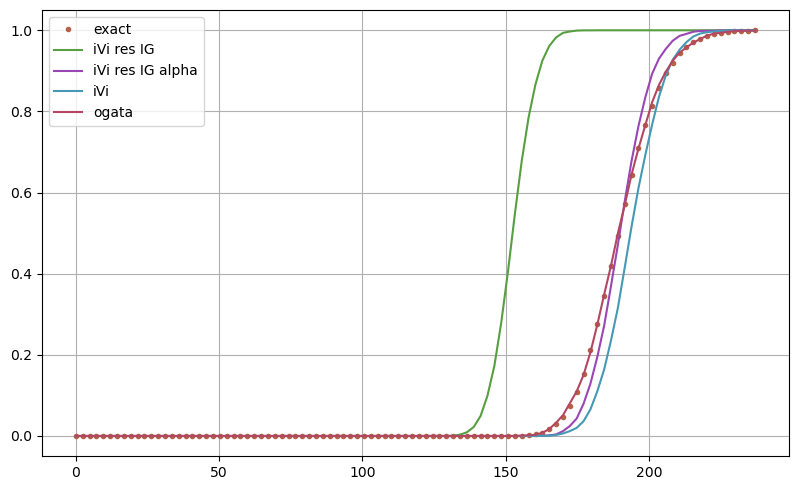

[]

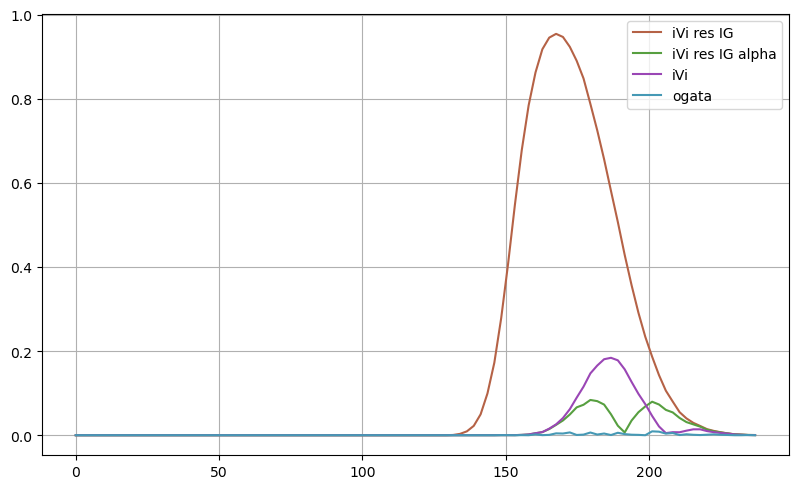

In [1038]:
CDF_exact = sm.distributions.ECDF(U_T_sample)
CDF_iVi_res_IG = sm.distributions.ECDF(U_res_IG[-1])
CDF_iVi_res_IG_alpha = sm.distributions.ECDF(U_res_IG_alpha[-1])
CDF_iVi = sm.distributions.ECDF(U[-1])
CDF_ogata = sm.distributions.ECDF(U_T_sample_ogata)

X = np.linspace(0,np.max(U[-1]), 100)
plt.plot(X, CDF_exact(X), label="exact", linestyle = ' ', marker = '.')
plt.plot(X, CDF_iVi_res_IG(X), label="iVi res IG")
plt.plot(X, CDF_iVi_res_IG_alpha(X), label="iVi res IG alpha")
plt.plot(X, CDF_iVi(X), label="iVi")
plt.plot(X, CDF_ogata(X), label="ogata")
plt.legend()
plt.plot()
plt.show()

X = np.linspace(0,np.max(U[-1]), 100)
plt.plot(X, np.abs(CDF_iVi_res_IG(X) - CDF_exact(X)), label="iVi res IG")
plt.plot(X, np.abs(CDF_iVi_res_IG_alpha(X) - CDF_exact(X)), label="iVi res IG alpha")
plt.plot(X, np.abs(CDF_iVi(X) - CDF_exact(X)), label="iVi")
plt.plot(X, np.abs(CDF_ogata(X) - CDF_exact(X)), label="ogata")
plt.legend()
plt.plot()
#plt.plot(X, [CDF_exact[x] for x in X])

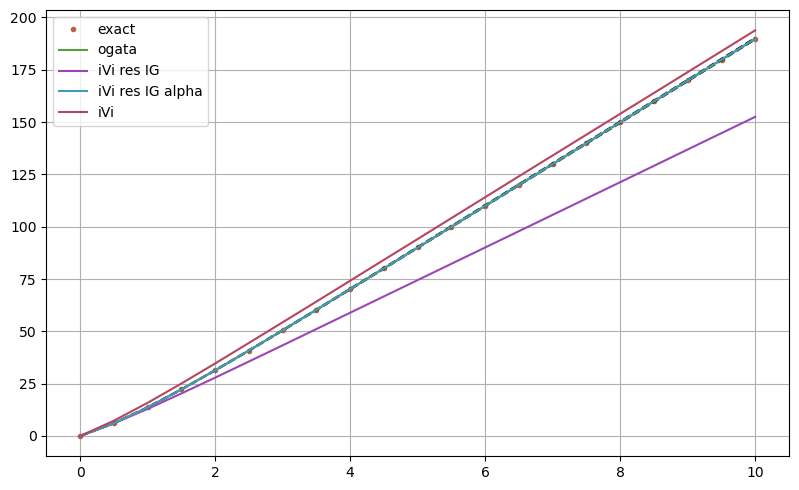

/var/folders/n8/x19ps_h16ng3xc6b7rszr8bw0000gn/T/ipykernel_75178/1365778148.py:18: RuntimeWarning: invalid value encountered in divide
  plt.plot(t_grid, np.abs(U_sample_ogata_mean - U_sample_mean) / U_sample_mean, label = "ogata")
/var/folders/n8/x19ps_h16ng3xc6b7rszr8bw0000gn/T/ipykernel_75178/1365778148.py:19: RuntimeWarning: invalid value encountered in divide
  plt.plot(t_grid, np.abs(U_res_IG_mean - U_sample_mean) / U_sample_mean, label = "iVi res IG")
/var/folders/n8/x19ps_h16ng3xc6b7rszr8bw0000gn/T/ipykernel_75178/1365778148.py:20: RuntimeWarning: invalid value encountered in divide
  plt.plot(t_grid, np.abs(U_res_IG_alpha_mean - U_sample_mean) / U_sample_mean, label = "iVi res IG alpha")
/var/folders/n8/x19ps_h16ng3xc6b7rszr8bw0000gn/T/ipykernel_75178/1365778148.py:21: RuntimeWarning: invalid value encountered in divide
  plt.plot(t_grid, np.abs(U_mean - U_sample_mean) / U_sample_mean, label = "iVi")


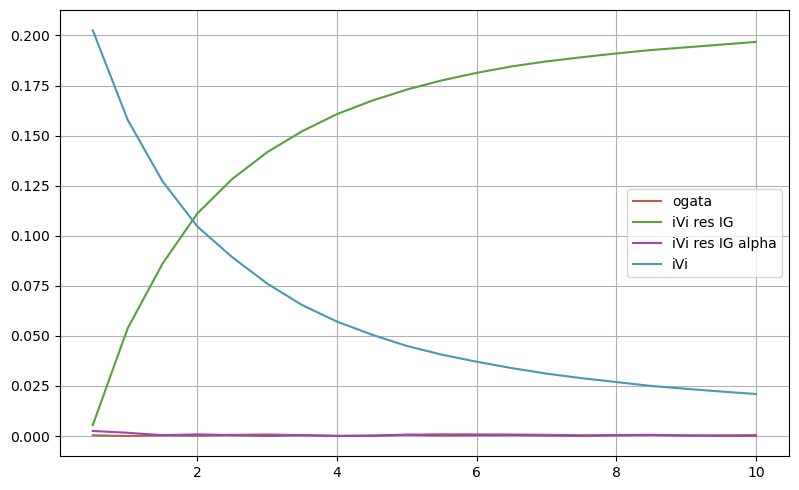

In [1039]:
U_sample_mean = np.mean(U_sample, axis = 0)
U_sample_std = np.std(U_sample, axis = 0)
U_sample_ogata_mean = np.mean(U_sample_ogata, axis = 0)
U_res_IG_mean = np.mean(U_res_IG, axis = 1)
U_res_IG_alpha_mean = np.mean(U_res_IG_alpha, axis = 1)
U_mean = np.mean(U, axis = 1)

plt.plot(t_grid, U_sample_mean, label = "exact", linestyle = ' ', marker = '.')
plt.plot(t_grid, U_sample_mean - 2 * U_sample_std / np.sqrt(n_paths), linestyle = '--', color = 'black')
plt.plot(t_grid, U_sample_mean + 2 * U_sample_std / np.sqrt(n_paths), linestyle = '--', color = 'black')
plt.plot(t_grid, U_sample_ogata_mean, label = "ogata")
plt.plot(t_grid, U_res_IG_mean, label = "iVi res IG")
plt.plot(t_grid, U_res_IG_alpha_mean, label = "iVi res IG alpha")
plt.plot(t_grid, U_mean, label = "iVi")
plt.legend()
plt.show()

plt.plot(t_grid, np.abs(U_sample_ogata_mean - U_sample_mean) / U_sample_mean, label = "ogata")
plt.plot(t_grid, np.abs(U_res_IG_mean - U_sample_mean) / U_sample_mean, label = "iVi res IG")
plt.plot(t_grid, np.abs(U_res_IG_alpha_mean - U_sample_mean) / U_sample_mean, label = "iVi res IG alpha")
plt.plot(t_grid, np.abs(U_mean - U_sample_mean) / U_sample_mean, label = "iVi")
plt.legend()
plt.show()

Right endpoint VS trapezes
------------

In [60]:
T = 0.1
#K = ExponentialKernel(c=0.8, lam=1)
#K = FractionalKernel(c = 0.5, H = -0.4)
#K = GammaKernel(alpha = 2.5, lam = 1, c= 1)
#K = ConstantKernel(c=0.8)
rng = np.random.default_rng(seed=42)

n_paths = 10000
rng = np.random.default_rng(seed=42)

hawkes_arrivals_sample = [simulate_hawkes(T=T, g0=lambda t : g0_const(t, mu=mu), g0_upper_bound=mu, kernel=K, rng=rng)
                          for _ in range(n_paths)]

N_T_sample = np.array([len(hawkes_arrivals) for hawkes_arrivals in hawkes_arrivals_sample])
U_T_sample = np.array([ivi_hawkes.U_from_jumps(np.array(T), hawkes_arrivals)[0] for hawkes_arrivals in hawkes_arrivals_sample])

In [61]:
print(np.mean(U_T_sample))

0.3132081018456297


In [62]:
Ws = np.linspace(-0.5, 0, 1000)
exact_CF = np.mean(np.exp( Ws.reshape(-1, 1) * U_T_sample.reshape(1, -1)), axis = 1)
stds_cf = np.std(np.exp( Ws.reshape(-1, 1) * U_T_sample.reshape(1, -1)), axis = 1)

0.07869386805747332
0.042612263885053375


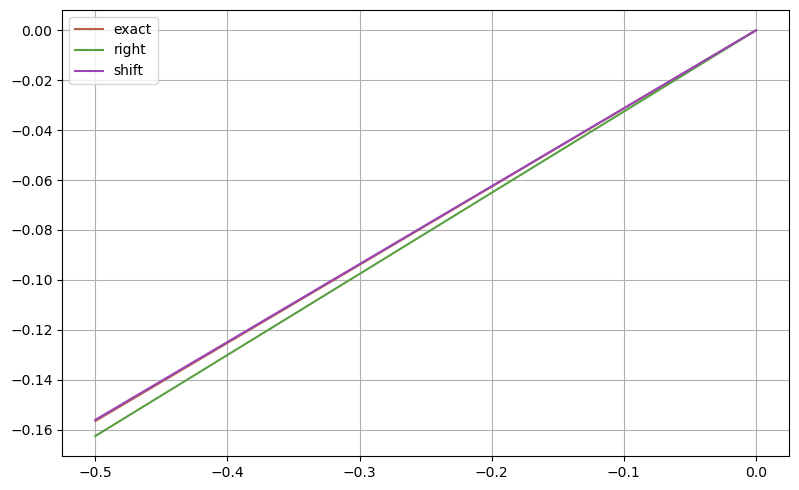

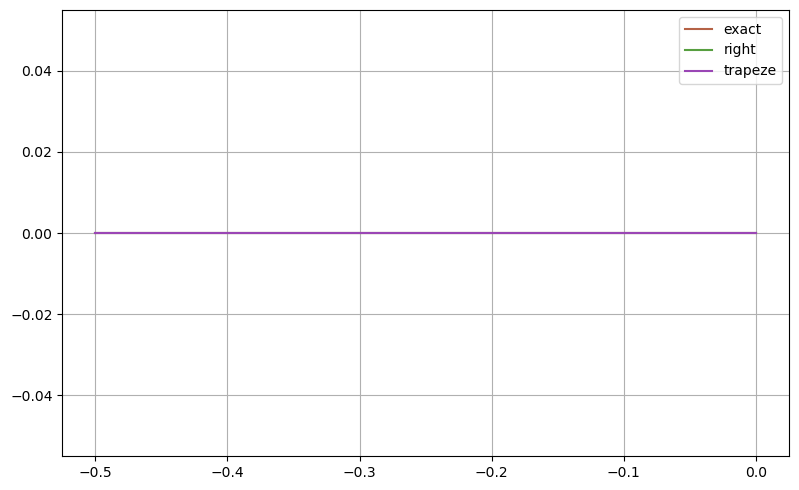

In [63]:
k_0 = K.integrated_kernel(T)
print(k_0)
k_tilde = K.double_integrated_kernel(T) / T
print(k_tilde)

def CF_trapeze(w):
    return (mu * T * (1 - k_tilde) / (2 * (k_tilde)**2) * (1 - np.sqrt(1 - 2 * k_0 * k_tilde / (1 - k_tilde)**2 * w)))

def CF_right(w):
    return (mu * T * (1 - k_0) / (k_0)**2 * (1 - np.sqrt(1 - 2 * (k_0 / (1 - k_0))**2 * w)))

def CF_shift(w):
    return (w * mu * T *(1 - k_0 / (2 * k_tilde))) + CF_trapeze(w)

def CF_exp(w):
    psi = (1 - k_tilde) / k_tilde * (1 - np.sqrt(1 - 2 * k_0 * k_tilde / (1 - k_tilde)**2 * w))
    return (mu * T / 2 * (2 * w + np.exp(psi) - 1))

plt.plot(Ws, np.log(np.real(exact_CF)), label = "exact")
#plt.plot(Ws, np.real(exact_CF) - 2 * stds_cf / np.sqrt(n_paths), label = "exact", linestyle = '--', color = 'black')
#plt.plot(Ws, np.real(exact_CF) + 2 * stds_cf / np.sqrt(n_paths), label = "exact", linestyle = '--', color ='black')
plt.plot(Ws, [CF_right(w).real for w in Ws], label = "right")
#plt.plot(Ws, [CF_trapeze(w).real for w in Ws], label = "trapeze")
plt.plot(Ws, [CF_shift(w).real for w in Ws], label = "shift")
#plt.plot(Ws, [CF_exp(w).real for w in Ws], label = "exp")
#plt.plot(Ws, 1 + np.mean(U_T_sample) * Ws)
plt.legend()
plt.show()
plt.plot(Ws, np.imag(exact_CF), label = "exact")
plt.plot(Ws, [CF_right(w).imag for w in Ws], label = "right")
plt.plot(Ws, [CF_trapeze(w).imag for w in Ws], label = "trapeze")
plt.legend()
plt.show()

## Conclusions
- Very good performance of iVi when $N_T \gg 1$
- Many timesteps are needed in stationary regime for exponential kernel. iVi becomes less efficient than other methods